In [2]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.io.shapereader as shpreader


import matplotlib.backends.backend_pdf as pdf
import matplotlib.font_manager as mfm
import matplotlib.patches as patches

In [3]:
# ignore unimportant warning that comes up
import warnings
from shapely.errors import ShapelyDeprecationWarning

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [4]:
# clean data and make a dataframe and bbox
import json
import numpy as np

with open('pools.json','r') as f:
    data = json.load(f)

for pool in data:
    pool['address'] = pool['address'].strip()
    if(len(pool['coordinates']) > 0):
        pool['latitude'], pool['longitude'] = float(pool['coordinates'].split(',')[0]), float('-' + pool['coordinates'].split(',')[1])

df = pd.DataFrame(data=data)

BBox = (df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max())


import inspect

def axis_data_coords_sys_transform(axis_obj_in,xin,yin,inverse=False):
    """ inverse = False : Axis => Data
                = True  : Data => Axis
    """
    xlim = axis_obj_in.get_xlim()
    ylim = axis_obj_in.get_ylim()

    xdelta = xlim[1] - xlim[0]
    ydelta = ylim[1] - ylim[0]
    if not inverse:
        xout =  xlim[0] + xin * xdelta
        yout =  ylim[0] + yin * ydelta
    else:
        xdelta2 = xin - xlim[0]
        ydelta2 = yin - ylim[0]
        xout = xdelta2 / xdelta
        yout = ydelta2 / ydelta
    return xout,yout

fig = plt.figure()
ax = plt.axes(projection=ccrs.Mercator())

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

# region_extent = capital_region_extent
# # ax.set_extent(region_extent, crs=ccrs.PlateCarree())
extent = (-26,-12,62,68)
ax.set_extent(extent, crs=ccrs.PlateCarree())
# ax.set_global()
center = [((-26) + (-12))/2, (62 + 68)/2]
# ax.set_title('Ísland')
ax.coastlines()


plt.draw()
l = plt.plot(center[0],center[1],'x', color='black', markersize=10, linestyle="None", transform=ccrs.PlateCarree())
l2 = plt.plot(1.85713067, -5.56214424,'o',color='green',markersize=15,linestyle="None",transform=ccrs.PlateCarree())
print('--1-1-1-11--1-1 transform: ', ax.transData.inverted().transform((1.85713067, -5.56214424)))

MIN_LON = -26
MAX_LON = -12
MIN_LAT = 62
MAX_LAT = 68
width = 15
height = 10
# longitude = MIN_LON + x * (MAX_LON-MIN_LON) / width
# latitude = MIN_LAT + y * (MAX_LAT-MIN_LAT) / height



print([p.get_xydata() for p in [l for l in l2]])
fig.canvas.draw()



axis_to_data = ax.transAxes + ax.transData.inverted()
data_to_axis = axis_to_data.inverted()
points_data = axis_to_data.transform(center)
points_data2 = data_to_axis.transform(center)
points_data3 = ax.transLimits.transform(center)
print(center, '\n', points_data, '\n', points_data2, '\n', points_data3, '\n')


print(axis_data_coords_sys_transform(ax,center[0],center[1]))
print(axis_data_coords_sys_transform(ax,center[0],center[1], inverse=True))

# for line in l:
    # print(dir(line))
    # print(line.get_transform())
    # line.set_transform(line.get_transform().inverted())
    # print(line.get_transform())
    # line.set_transform(ax.get_transform().inverted())
    # for point in line.get_xydata():
    #     print(point)

# plt.plot(50,50,'o',color='red',markersize=10,linestyle='None')




# temp = (center[0],center[1])

# print(-25.356,-11.997,62.472,67.458)
# # print('original: ',temp)
# # print('transform: ', ax.transData.transform(temp))
# # print('inverse of transform: ', ax.transData.inverted().transform(ax.transData.transform(temp)))



# # for val in inspect.getmembers(ax.bbox):
# #     print(val)
# # print('bbox: ', inspect.getmembers(ax.bbox))
# print('xlim: ', ax.get_xlim(), 'ylim: ', ax.get_ylim())
# print('window extent: ', ax.get_window_extent())
def inv(xy):
    return ax.transData.inverted().transform(xy)
def trn(xy):
    return ax.transData.transform(xy)
plt.draw()
print('------------ ', ax.get_position(), ax.get_xscale(),ax.get_xaxis(),ax.get_yaxis(), fig.dpi_scale_trans)

# extent = [-26,-12,62,68]
# print('trn xy: ', trn((-26, 62)))
# print(trn((-12,68)))

# print(inv((ax.get_xlim()[0],ax.get_ylim()[0])))

# print((temp))
# print(trn(temp))
# print('bbox xmin xmax ymin ymax: ', (ax.bbox.xmin, ax.bbox.xmax, ax.bbox.ymin, ax.bbox.ymax))
# print(ax.get_window_extent())

# print(center)

# transform = ccrs.Mercator()._as_mpl_transform(ax)
# # print('transform: ', dir(transform), transform.transform_point(temp))

# # for index, obj in pool.iterrows():
# #     if(obj['longitude'] > 0):
# #         ax.text(obj['latitude'],obj['longitude'], obj['name'], color='black', size=5, ha='center', va='center', transform=ccrs.PlateCarree())#, 

# # plt.gca().set_axis_off()
# print((plt.gca().get_ylim()))
# print(dir(plt.gca().get_transform()))
# print(plt.gca().transform_point)


import matplotlib.lines as lines
mynewline = lines.Line2D((0,0.5,1),(0.5,0.5,0),color='g',transform=plt.gca().transAxes) # Axes coordinates

plt.gca().add_artist(mynewline)

plt.show()
# fig.set_clip_box(ax.get_window_extent())
# # plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
# #             hspace = 0, wspace = 0)
# # plt.margins(0,0)
plt.savefig('transform.svg')

# longitude = MIN_LON + x * (MAX_LON-MIN_LON) / width
# latitude = MIN_LAT + y * (MAX_LAT-MIN_LAT) / height
# plt.show()

MIN_LON, MIN_LAT, MAX_LON, MAX_LAT = -26, -12, 62, 68
print(MIN_LON, MIN_LAT, MAX_LON, MAX_LAT)
extent = (MIN_LON, MIN_LAT, MAX_LON, MAX_LAT)

width = 15
height = 10

longitude = MIN_LON + x * (MAX_LON-MIN_LON) / width
latitude = MIN_LAT + y * (MAX_LAT-MIN_LAT) / height



In [5]:
def lon_to_x(lon,xmin,xmax,width,normalized=False):
    if normalized:
        return ((lon-xmin) / ((xmax-xmin)/width))/width
    return (lon-xmin) / ((xmax-xmin)/width)

def lat_to_y(lat,ymin,ymax,height,normalized=False):
    if normalized:
        return ((lat-ymin) / ((ymax-ymin)/height))/height
    return (lat-ymin) / ((ymax-ymin)/height)

def get_xy_normalized(lon,lat,min_lon,max_lon,min_lat,max_lat,width,height):
    return lon_to_x(lon,min_lon,max_lon,width,normalized=True),lat_to_y(lat,min_lat,max_lat,height,normalized=True)

-2894306.760625113 8821377.203064468 -1335833.8895192828 10407332.515149962
1558472.87110583 1585955.3120854944
372358.9756553783 508446.0505988132
--------------
x pos:  0.2389255421502251
y pos:  0.32059292385118876
--------------


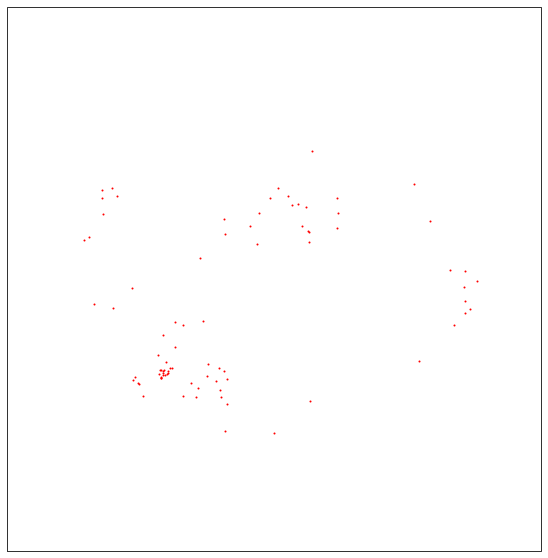

In [27]:
MIN_LON, MAX_LON, MIN_LAT, MAX_LAT = -26, -12, 62, 68
extent = (MIN_LON, MAX_LON, MIN_LAT, MAX_LAT)


width = 15
height = 10

fig = plt.figure(figsize=(width,height))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent(extent)

m = ccrs.Mercator()
pc = ccrs.PlateCarree()

xmin,ymin = m.transform_point(extent[0],extent[2],pc)
xmax,ymax = m.transform_point(extent[1],extent[3],pc)
print(xmin,ymin,xmax,ymax)

lon, lat = [pool['longitude'],pool['latitude']]

mlon,mlat = m.transform_point(lon,lat,pc)

width_m, height_m = (xmax-xmin), (ymax-ymin)
print(width_m,height_m)

xpos = mlon - xmin
ypos = mlat - ymin
print(xpos,ypos)

xscale,yscale = width/width_m, height/height_m


print('--------------')
print('x pos: ',(xpos * xscale)/width)
print('y pos: ', (ypos * yscale)/height)
print('--------------')

# t = ax.transData.inverted().transform((lat, lon))
# abs_min = ax.transData.inverted().transform((-180, -180))
# abs_max = ax.transData.inverted().transform((180, 180))
# print('min: ', abs_min[0], abs_min[1])
# print('point: ', t[0], t[1])
# print('max: ', abs_max[0], abs_max[1])
# p = ax.transData.transform((lat,lon))
# p2 = ax.transData.inverted().transform(p)
# print(p,p2)
# df['lon_normalized'] = lon_to_x(df['longitude'],MIN_LON, MAX_LON,width,normalized=True)
# df['lat_normalized'] = lat_to_y(df['latitude'],MIN_LAT, MAX_LAT,height,normalized=True)
# print(df)

# plt.gca().set_axis_off()
# fig.set_clip_box(ax.get_window_extent())
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#             hspace = 0, wspace = 0)
# plt.margins(0,0)
# x,y = -26, 62
plt.plot(df['longitude'], df['latitude'],'o',color='red',markersize=1,transform=ccrs.PlateCarree())
# plt.plot(x, y,'o',color='red',markersize=20,transform=ccrs.PlateCarree())

# plt.draw()
# fig_width, fig_height = plt.gcf().get_size_inches()*plt.gcf().dpi
# print(fig.get_size_inches()*fig.dpi)

# print(get_xy_normalized(lon,lat,MIN_LON, MAX_LON, MIN_LAT, MAX_LAT,fig_width,fig_height))
# print(lon_to_x(lon,MIN_LON,MAX_LON,fig_width),lat_to_y(lat,MIN_LAT,MAX_LAT,fig_height))
plt.savefig('lol.svg')


    
    # lon_to_x(lon,MIN_LON,MAX_LON,width,normalized=True))
# (xmin, xmax), (ymin, ymax) = ccrs.Mercator().x_limits, ccrs.Mercator().y_limits
# print(xmin, xmax, ymin, ymax)

# x,y = ax.transData.transform((-90,90))
# print(x,y)

# print(x-xmin)